In [1]:
import os
import cv2
import numpy as np
from PIL import Image

from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline

## OpticalFlow between 2 frames

img_prv.shape : (48, 48, 3)
img_nxt.shape : (48, 48, 3)


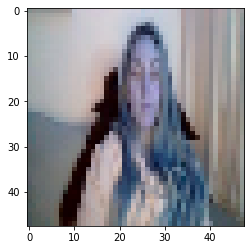

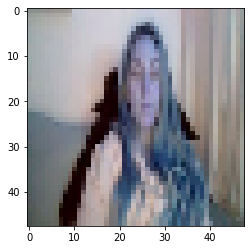

In [2]:
img_prv_gray = cv2.imread('data/video/20bn-jester-v1/100041/00001.jpg', cv2.IMREAD_GRAYSCALE)
img_nxt_gray = cv2.imread('data/video/20bn-jester-v1/100041/00020.jpg', cv2.IMREAD_GRAYSCALE)
img_prv_gray = cv2.resize(img_prv_gray, (48,48))
img_nxt_gray = cv2.resize(img_nxt_gray, (48,48))

img_prv = cv2.imread('data/video/20bn-jester-v1/100041/00001.jpg')
img_nxt = cv2.imread('data/video/20bn-jester-v1/100041/00002.jpg')
img_prv = cv2.resize(img_prv, (48,48))
img_nxt = cv2.resize(img_nxt, (48,48))


print("img_prv.shape :", img_prv.shape)
print("img_nxt.shape :", img_nxt.shape)

plt.figure()
plt.imshow( Image.fromarray(np.uint8(img_prv)) )
plt.figure()
plt.imshow( Image.fromarray(np.uint8(img_nxt)) )

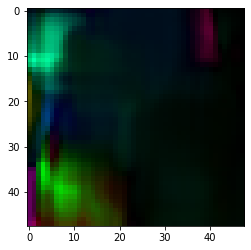

In [3]:
hsv_mask = np.zeros_like(img_prv)
hsv_mask[:,:,1] = 255


# flow = cv2.calcOpticalFlowFarneback(img_prv_gray, img_nxt_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
flow = cv2.calcOpticalFlowFarneback(img_prv_gray, img_nxt_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)


mag, ang = cv2.cartToPolar(flow[:, :, 0], flow[:, :, 1], angleInDegrees=True)
hsv_mask[:, :, 0] = ang / 2
hsv_mask[:, :, 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
 
bgr = cv2.cvtColor(hsv_mask, cv2.COLOR_HSV2BGR)
plt.imshow(bgr)

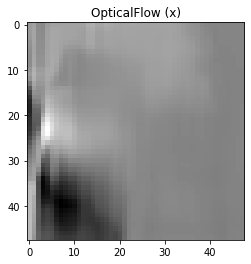

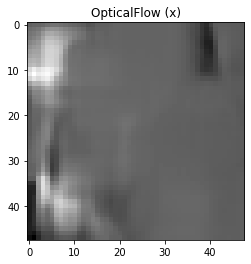

In [11]:
flow = cv2.calcOpticalFlowFarneback(img_prv_gray, img_nxt_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

plt.figure()
plt.title("OpticalFlow (x)")
plt.imshow(flow[:,:,0])
plt.gray()
plt.show()


plt.figure()
plt.title("OpticalFlow (x)")
plt.imshow(flow[:,:,1])
plt.gray()
plt.show()

## OpticalFlow in continuaus frames

**A. Original Image & Optical Flow in BGR (48,48,3)**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


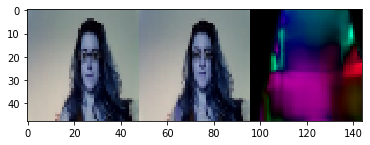

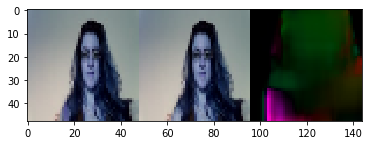

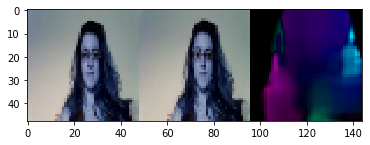

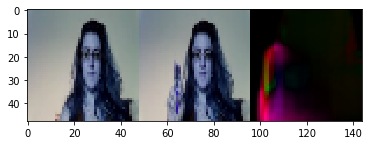

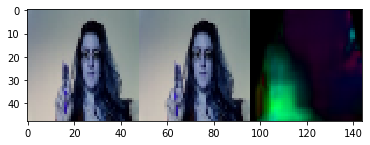

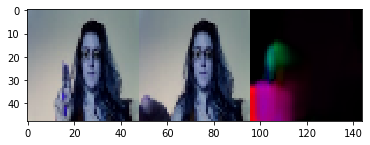

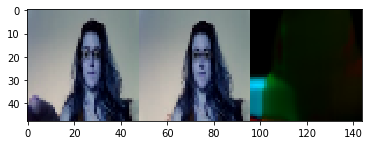

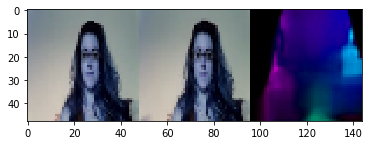

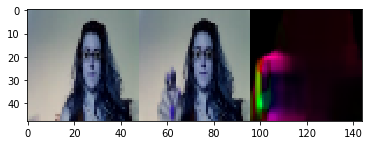

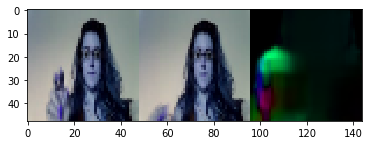

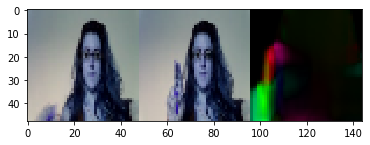

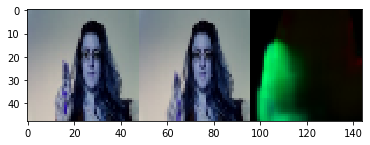

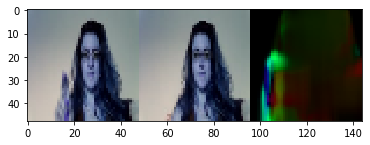

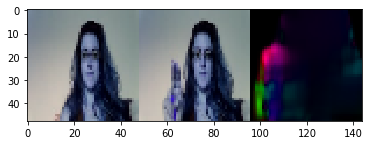

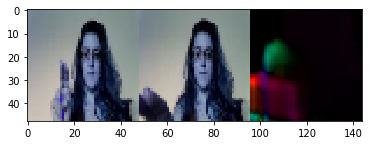

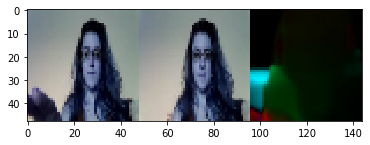

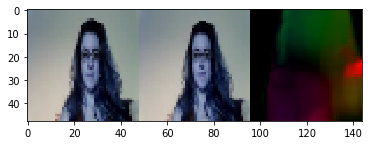

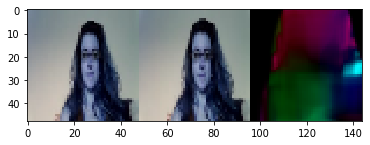

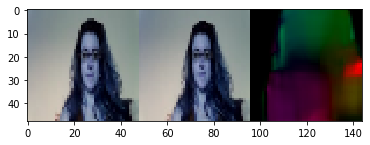

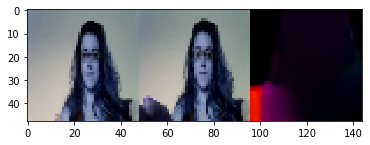

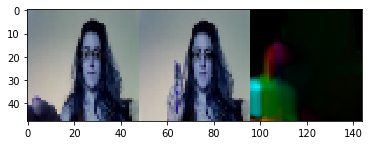

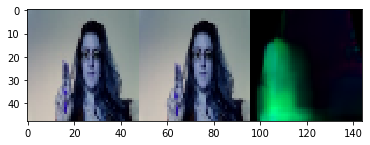

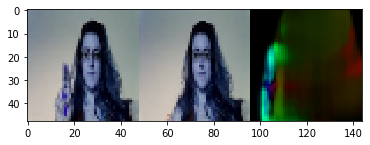

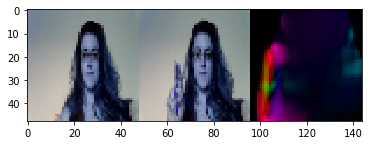

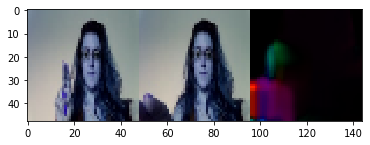

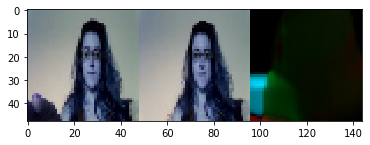

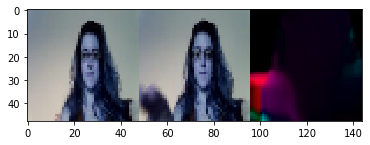

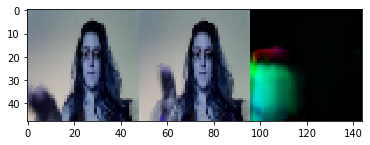

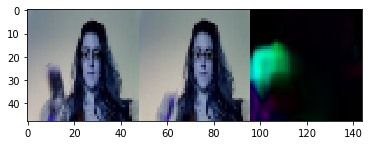

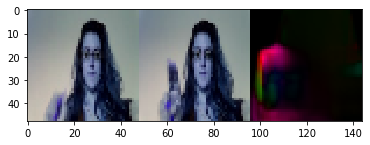

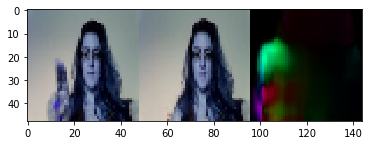

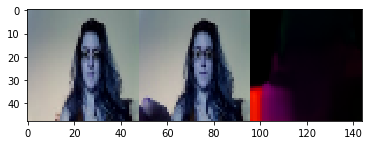

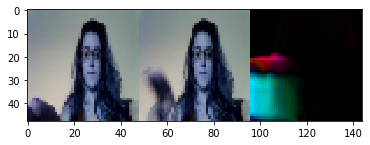

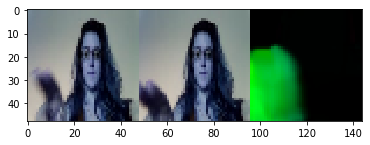

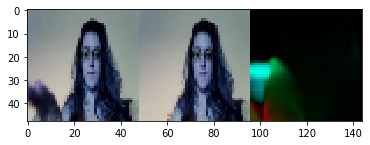

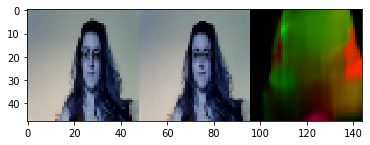

In [34]:
frame_id = str(3)
img_ori = []
img_flow = []


for i, img_filename in enumerate(os.listdir('./data/video/20bn-jester-v1/'+frame_id)):
    img_path = './data/video/20bn-jester-v1/'+frame_id+'/'+img_filename

    img_next = cv2.imread(img_path)
    img_next = cv2.resize(img_next, (48,48))
    img_next_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_next_gray = cv2.resize(img_next_gray, (48,48))


    if i == 0:
        img_prev = cv2.imread(img_path)
        img_prev = cv2.resize(img_prev, (48,48))
        img_prev_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_prev_gray = cv2.resize(img_prev_gray, (48,48))
        continue
    else:
        hsv_mask = np.zeros_like(img_prev)
        hsv_mask[:,:,1] = 255

        flow = cv2.calcOpticalFlowFarneback(img_prev_gray, img_next_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        mag, ang = cv2.cartToPolar(flow[:, :, 0], flow[:, :, 1], angleInDegrees=True)

        hsv_mask[:, :, 0] = ang / 2
        hsv_mask[:, :, 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

        # flow : (48,48,3)
        bgr = cv2.cvtColor(hsv_mask, cv2.COLOR_HSV2BGR)
        
        img_flow_plt = bgr
        img_prev_plt = img_prev
        img_next_plt = img_next
        
        # plot
        plt.figure()
        plt.imshow(np.concatenate([img_prev_plt, img_next_plt, img_flow_plt], 1))
        
    img_prev = img_next
    img_prev_gray = img_next_gray

**B. Original Image & Optical Flow in GRAY (48,48)**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


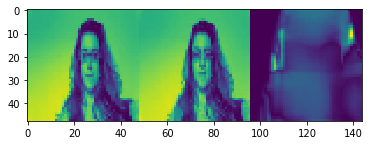

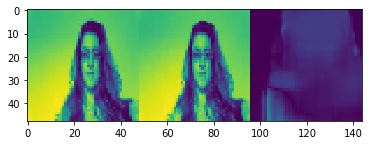

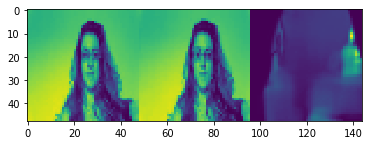

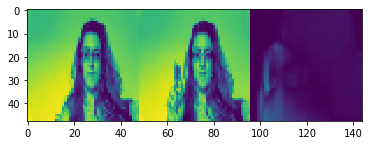

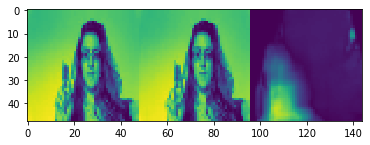

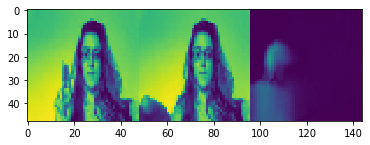

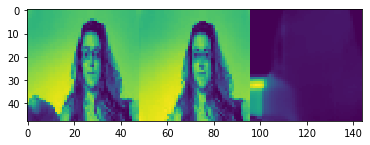

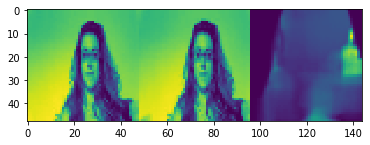

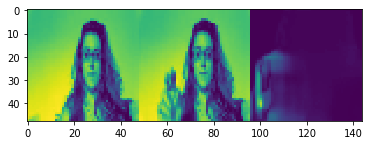

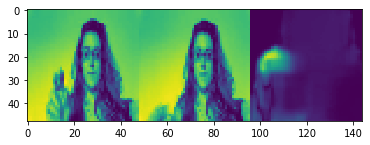

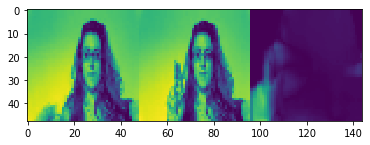

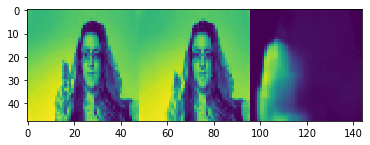

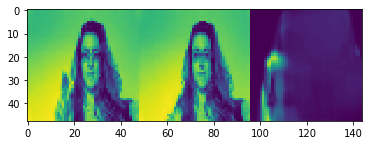

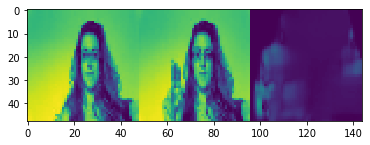

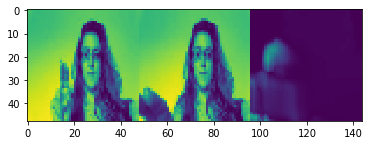

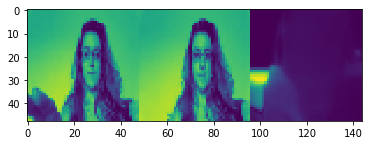

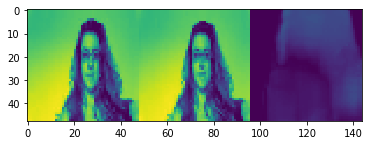

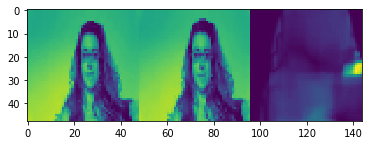

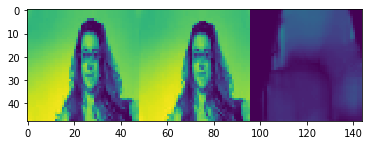

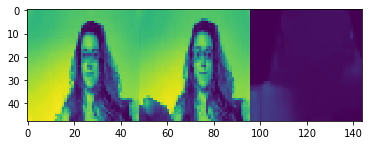

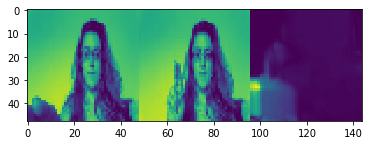

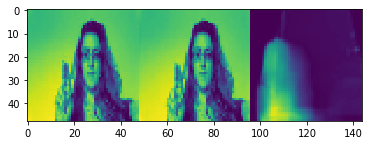

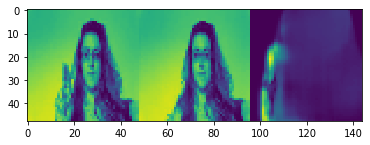

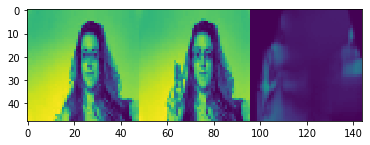

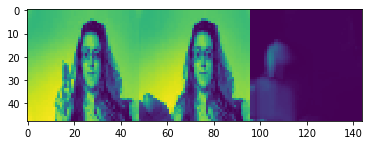

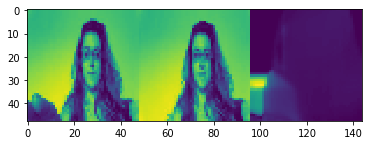

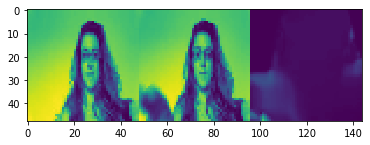

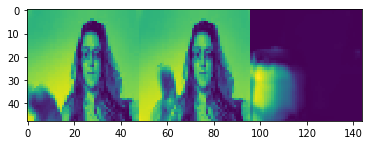

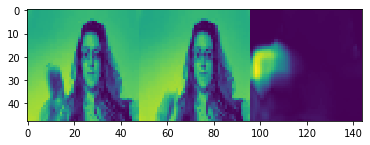

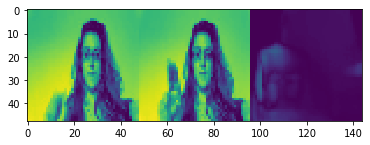

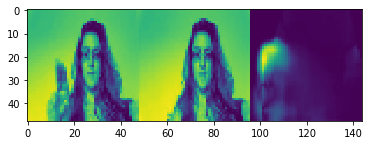

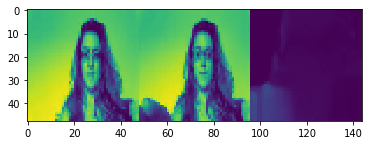

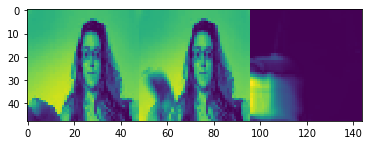

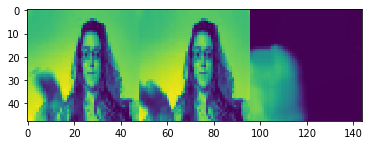

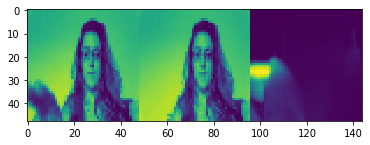

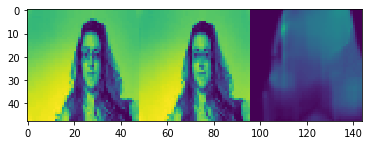

In [17]:
frame_id = str(3)
img_ori = []
img_flow = []


for i, img_filename in enumerate(os.listdir('./data/video/20bn-jester-v1/'+frame_id)):
    img_path = './data/video/20bn-jester-v1/'+frame_id+'/'+img_filename

    img_next = cv2.imread(img_path)
    img_next = cv2.resize(img_next, (48,48))
    img_next_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_next_gray = cv2.resize(img_next_gray, (48,48))

    if i == 0:
        img_prev_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_prev_gray = cv2.resize(img_prev_gray, (48,48))
        continue
    else:
        hsv_mask = np.zeros_like(img_next)
        hsv_mask[:, :, 1] = 255

        flow = cv2.calcOpticalFlowFarneback(img_prev_gray, img_next_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        mag, ang = cv2.cartToPolar(flow[:, :, 0], flow[:, :, 1], angleInDegrees=True)

        hsv_mask[:, :, 0] = ang / 2
        hsv_mask[:, :, 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

        # flow : (48,48,3)
        bgr = cv2.cvtColor(hsv_mask, cv2.COLOR_HSV2BGR)
        
        # to gray-scale
        img_flow_plt= cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY) 
        img_prev_plt = img_prev_gray 
        img_next_plt = img_next_gray
        
        # plot
        plt.figure()
        plt.imshow(np.concatenate([img_prev_plt, img_next_plt, img_flow_plt], 1))
        
    img_prev = img_next
    img_prev_gray = img_next_gray

In [ ]:
for frame_id in os.listdir('./data/video/20bn-jester-v1'):
    for i, img_filename in enumerate(os.listdir('./data/video/20bn-jester-v1/'+frame_id)):
        img_path = './data/video/20bn-jester-v1/'+frame_id+'/'+img_filename
        
        img_next = cv2.imread(img_path)
        img_next = cv2.resize(img_next, (48,48))
        img_next_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_next_gray = cv2.resize(img_next_gray, (48,48))

        
        if i == 0:
            img_prev = cv2.imread(img_path)
            img_prev = cv2.resize(img_prev, (48,48))
            img_prev_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img_prev_gray = cv2.resize(img_prev_gray, (48,48))
            continue
        else:
            hsv_mask = np.zeros_like(img_prev)
            hsv_mask[:,:,1] = 255

            flow = cv2.calcOpticalFlowFarneback(img_prev_gray, img_next_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            mag, ang = cv2.cartToPolar(flow[:, :, 0], flow[:, :, 1], angleInDegrees=True)
            
            hsv_mask[:, :, 0] = ang / 2
            hsv_mask[:, :, 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

            bgr = cv2.cvtColor(hsv_mask, cv2.COLOR_HSV2BGR)
            plt.figure()
            plt.imshow(bgr)
        
        img_prev = img_next
        img_prev_gray = img_next_gray
            

18


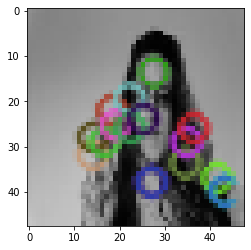

In [36]:
import cv2
import numpy as np

frame_id = str(3)

img = cv2.imread("./data/video/20bn-jester-v1/"+frame_id+"/00015.jpg")
img = cv2.resize(img, (48,48))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# detector = cv2.ORB_create()
detector = cv2.xfeatures2d.SIFT_create()

kp = detector.detect(gray, None)
print(len(kp))

cv2.drawKeypoints(gray, kp, img)

plt.imshow(img)

# cv2.imwrite('sift_keypoints.jpg',img)

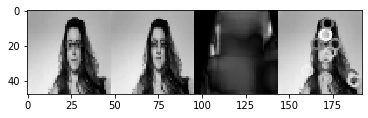

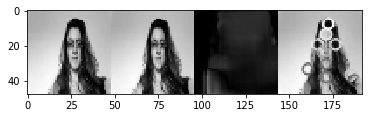

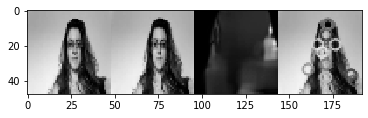

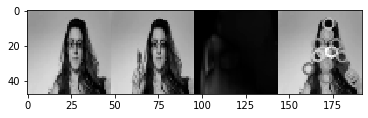

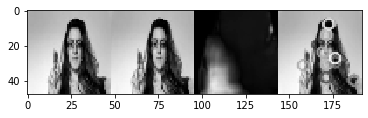

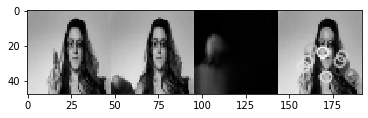

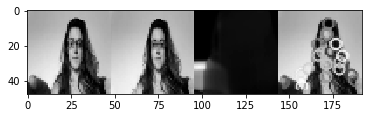

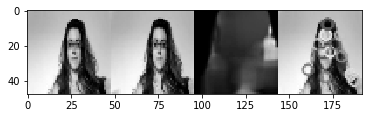

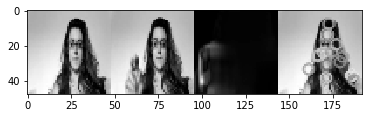

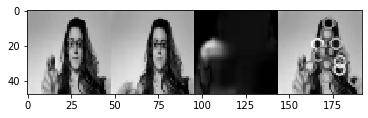

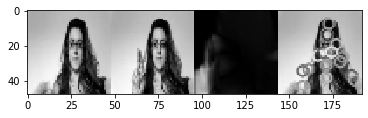

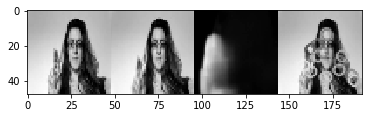

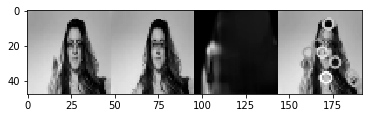

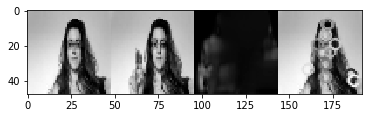

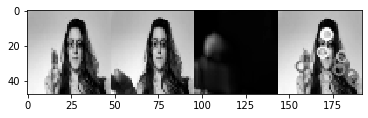

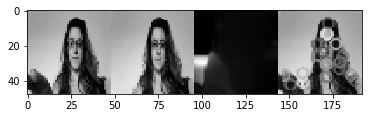

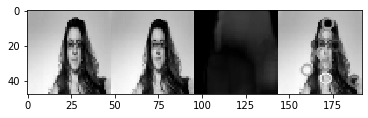

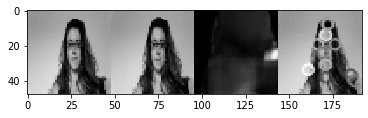

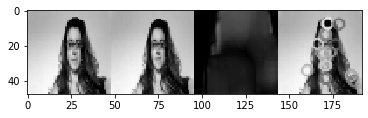

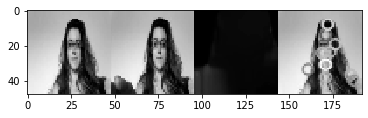

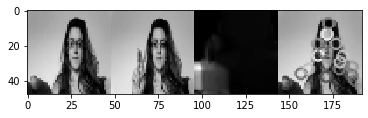

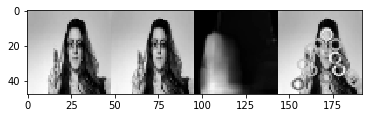

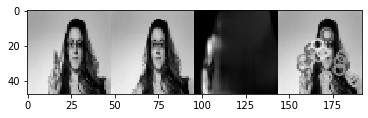

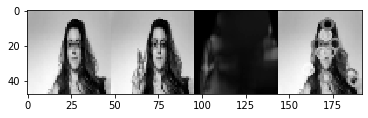

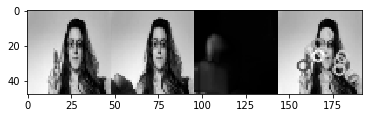

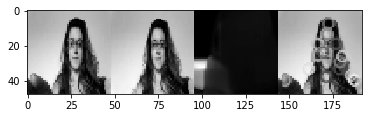

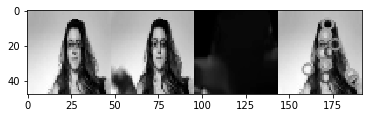

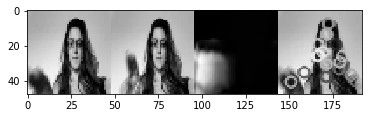

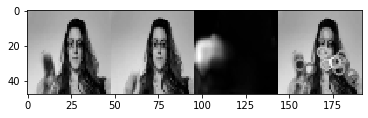

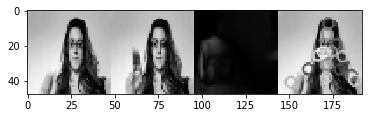

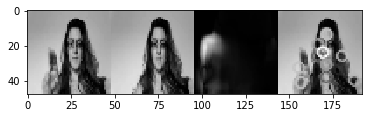

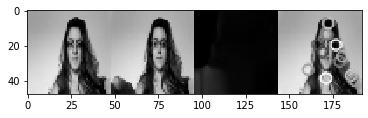

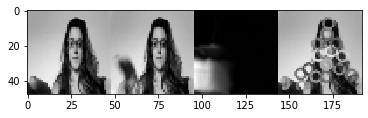

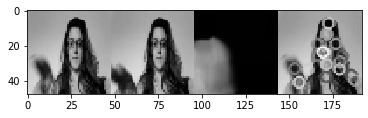

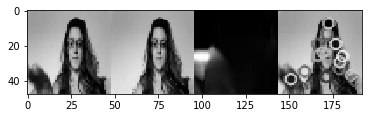

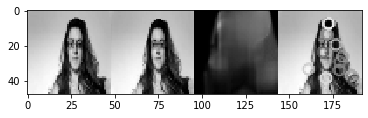

In [5]:
frame_id = str(3)

detector = cv2.xfeatures2d.SIFT_create()


for i, img_filename in enumerate(os.listdir('./data/video/20bn-jester-v1/'+frame_id)):
    img_path = './data/video/20bn-jester-v1/'+frame_id+'/'+img_filename

    if i == 0:
        img_prev = cv2.imread(img_path)
        img_prev = cv2.resize(img_prev, (48,48))
        img_prev_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_prev_gray = cv2.resize(img_prev_gray, (48,48))
        continue
    else:
        img_next = cv2.imread(img_path)
        img_next = cv2.resize(img_next, (48,48))
        img_next_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_next_gray = cv2.resize(img_next_gray, (48,48))
    
        # Keypoint detection
        img_kp = deepcopy(img_prev)
        img_kp_gray = cv2.cvtColor(img_kp, cv2.COLOR_BGR2GRAY)
        kp = detector.detect(img_kp_gray, None)
        cv2.drawKeypoints(img_kp_gray, kp, img_kp)
        
        # optical flow
        hsv_mask = np.zeros_like(img_next)
        hsv_mask[:, :, 1] = 255

        flow = cv2.calcOpticalFlowFarneback(img_prev_gray, img_next_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        mag, ang = cv2.cartToPolar(flow[:, :, 0], flow[:, :, 1], angleInDegrees=True)

        hsv_mask[:, :, 0] = ang / 2
        hsv_mask[:, :, 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

        # flow : (48,48,3)
        bgr = cv2.cvtColor(hsv_mask, cv2.COLOR_HSV2BGR)
        
        # to gray-scale
        img_kp_plt= cv2.cvtColor(img_kp, cv2.COLOR_BGR2GRAY) 
        img_flow_plt= cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY) 
        img_prev_plt = img_prev_gray 
        img_next_plt = img_next_gray
        
        # plot
        plt.figure()
        plt.imshow(np.concatenate([img_prev_plt, img_next_plt, img_flow_plt, img_kp_plt], 1))
        plt.gray()
        plt.show()
        
    img_prev = img_next
    img_prev_gray = img_next_gray

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


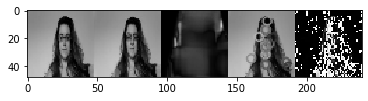

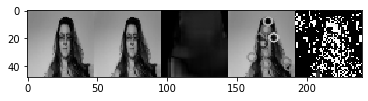

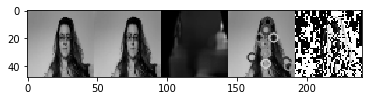

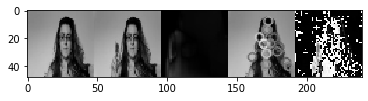

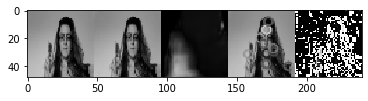

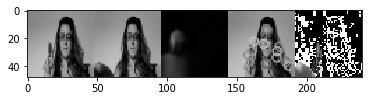

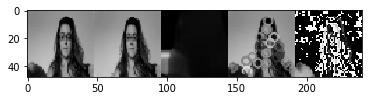

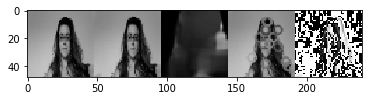

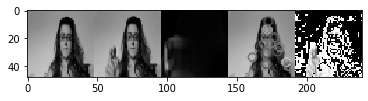

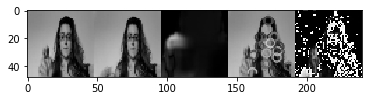

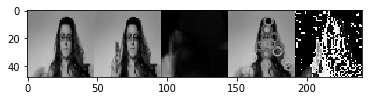

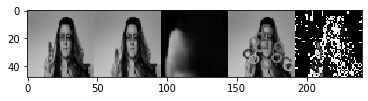

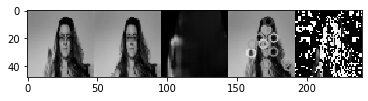

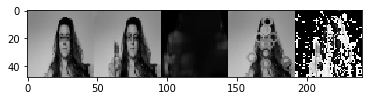

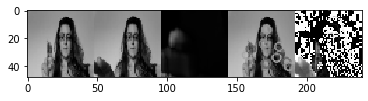

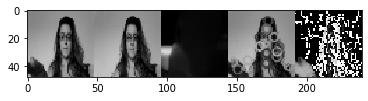

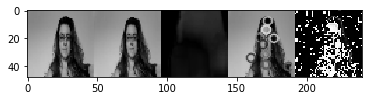

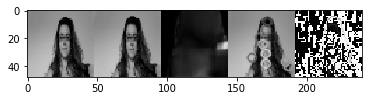

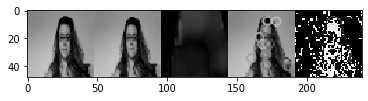

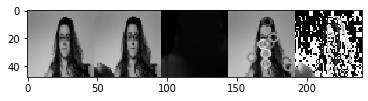

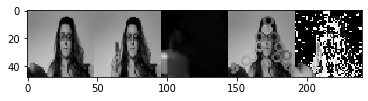

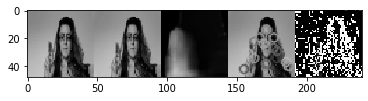

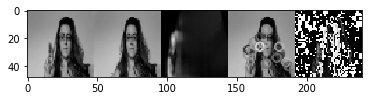

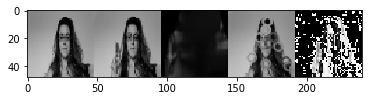

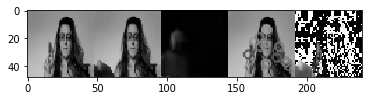

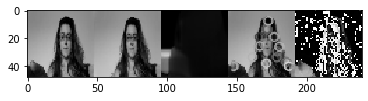

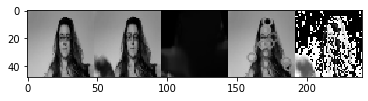

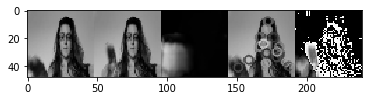

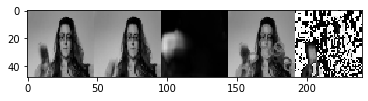

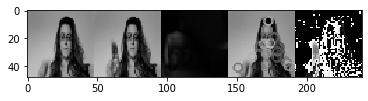

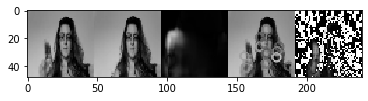

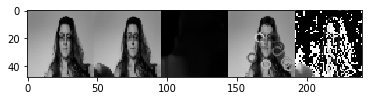

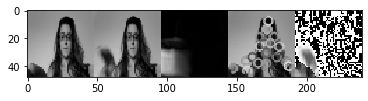

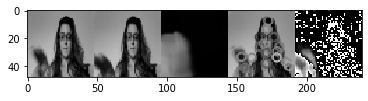

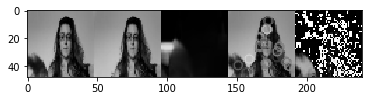

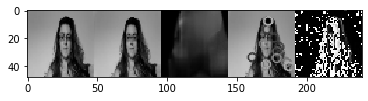

In [19]:
frame_id = str(3)

detector = cv2.xfeatures2d.SIFT_create()


for i, img_filename in enumerate(os.listdir('./data/video/20bn-jester-v1/'+frame_id)):
    img_path = './data/video/20bn-jester-v1/'+frame_id+'/'+img_filename

    if i == 0:
        img_prev = cv2.imread(img_path)
        img_prev = cv2.resize(img_prev, (48,48))
        img_prev_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_prev_gray = cv2.resize(img_prev_gray, (48,48))
        continue
    else:
        img_next = cv2.imread(img_path)
        img_next = cv2.resize(img_next, (48,48))
        img_next_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_next_gray = cv2.resize(img_next_gray, (48,48))
        
        # Diffs
        img_diff_gray = img_next_gray - img_prev_gray
        img_diff_gray = (img_diff_gray - img_diff_gray.min()) / (img_diff_gray.max() - img_diff_gray.min())
        img_diff_gray = img_diff_gray * 255
    
    
        # Keypoint detection
        img_kp = deepcopy(img_prev)
        img_kp_gray = cv2.cvtColor(img_kp, cv2.COLOR_BGR2GRAY)
        kp = detector.detect(img_kp_gray, None)
        cv2.drawKeypoints(img_kp_gray, kp, img_kp)
        
        # optical flow
        hsv_mask = np.zeros_like(img_next)
        hsv_mask[:, :, 1] = 255

        flow = cv2.calcOpticalFlowFarneback(img_prev_gray, img_next_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        mag, ang = cv2.cartToPolar(flow[:, :, 0], flow[:, :, 1], angleInDegrees=True)

        hsv_mask[:, :, 0] = ang / 2
        hsv_mask[:, :, 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

        # flow : (48,48,3)
        bgr = cv2.cvtColor(hsv_mask, cv2.COLOR_HSV2BGR)
        
        # to gray-scale
        img_diff_plt = img_diff_gray
        img_kp_plt= cv2.cvtColor(img_kp, cv2.COLOR_BGR2GRAY) 
        img_flow_plt= cv2.cvtColor(bgr, cv2.COLOR_BGR2GRAY) 
        img_prev_plt = img_prev_gray 
        img_next_plt = img_next_gray
        
        # plot
        plt.figure()
        plt.imshow(np.concatenate([img_prev_plt, img_next_plt, img_flow_plt, img_kp_plt, img_diff_plt], 1))
        
    img_prev = img_next
    img_prev_gray = img_next_gray


In [21]:
frame_id = str(3)

video_bgr
video_bgr=[]
video_gray=[]

for i, img_filename in enumerate(os.listdir('./data/video/20bn-jester-v1/'+frame_id)):
    img_path = './data/video/20bn-jester-v1/'+frame_id+'/'+img_filename
    
    img_bgr = cv2.imread(img_path)
    img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    video_bgr.append(img_bgr)
    video_gray.append(img_gray)
    
video_bgr = np.array(video_bgr)
video_gray = np.array(video_gray)

In [23]:
print(video_bgr.shape)
print(video_gray.shape)

(37, 100, 176, 3)
(37, 100, 176)


In [25]:
video_gray_diff1=[]
video_gray_diff2=[]
video_gray_diff3=[]

# diff
for i in range(video_gray.shape[0]):
    if i > 0:
        img = video_gray[i] - video_gray[i-1]
        img = (img - img.min()) / (img.max() - img.min())
        img = img * 255
        video_gray_diff1.append(img)
video_gray_diff1 = np.array(video_gray_diff1)

# diff2
for i in range(video_gray_diff1.shape[0]):
    if i > 0:
        img = video_gray_diff1[i] - video_gray_diff1[i-1]
        img = (img - img.min()) / (img.max() - img.min())
        img = img * 255
        video_gray_diff2.append(img)
video_gray_diff2 = np.array(video_gray_diff2)

# diff3
for i in range(video_gray_diff2.shape[0]):
    if i > 0:
        img = video_gray_diff2[i] - video_gray_diff2[i-1]
        img = (img - img.min()) / (img.max() - img.min())
        img = img * 255
        video_gray_diff3.append(img)
video_gray_diff3 = np.array(video_gray_diff3)

In [26]:
print(video_bgr.shape)
print(video_gray.shape)
print(video_gray_diff1.shape)
print(video_gray_diff2.shape)
print(video_gray_diff3.shape)

(37, 100, 176, 3)
(37, 100, 176)
(36, 100, 176)
(35, 100, 176)
(34, 100, 176)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


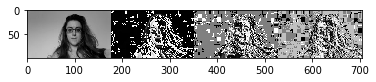

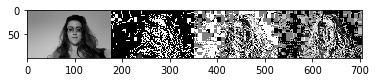

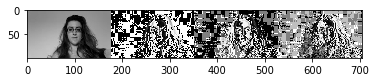

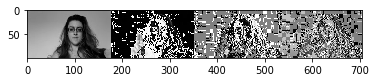

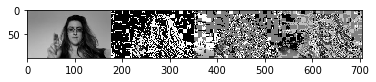

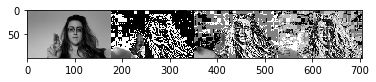

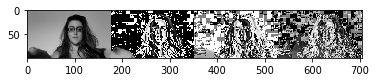

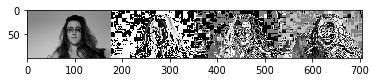

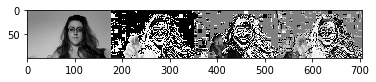

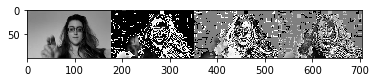

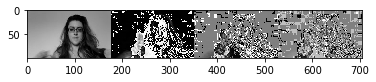

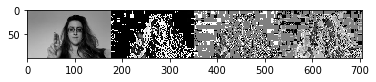

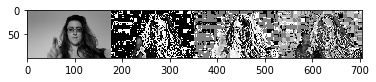

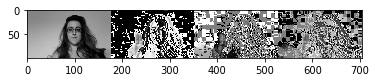

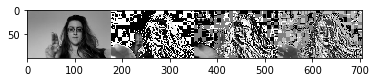

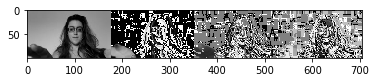

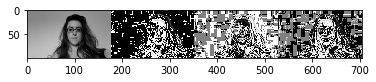

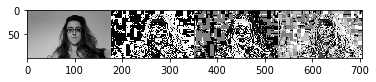

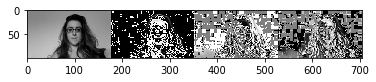

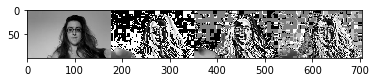

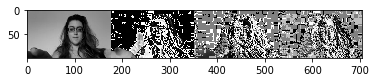

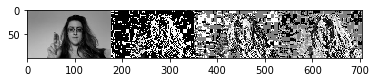

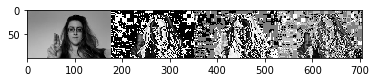

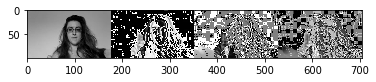

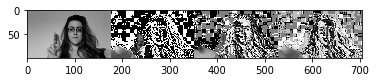

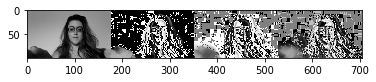

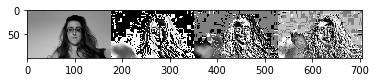

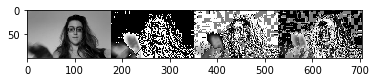

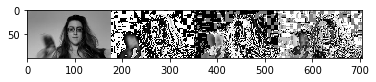

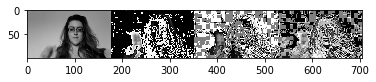

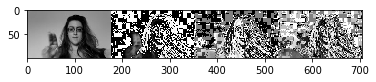

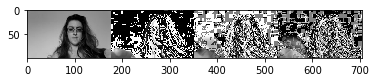

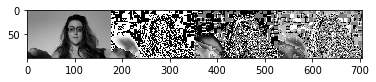

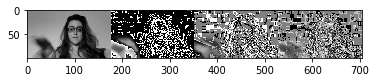

In [29]:
for i in range(video_gray_diff3.shape[0]):
    arr = np.concatenate([video_gray[i, :, :], video_gray_diff1[i, :, :], video_gray_diff2[i, :, :], video_gray_diff3[i, :, :]], 1)
    plt.figure()
    plt.imshow(arr)

In [35]:
video_gray_diff_from_start =[]
video_gray_diff_from_end =[]


# diff from start
for i in range(video_gray.shape[0]):
    if i > 0:
        img = video_gray[i] - video_gray[0]
        img = (img - img.min()) / (img.max() - img.min())
        img = img * 255
        video_gray_diff_from_start.append(img)
video_gray_diff_from_start = np.array(video_gray_diff_from_start)

# diff from end
for i in range(video_gray.shape[0]):
    if i < video_gray.shape[0] - 1:
        img = video_gray[i] - video_gray[video_gray.shape[0] - 1]
        img = (img - img.min()) / (img.max() - img.min())
        img = img * 255
        video_gray_diff_from_end.append(img)
video_gray_diff_from_end = np.array(video_gray_diff_from_end)

In [36]:
print(video_gray_diff_from_start.shape)
print(video_gray_diff_from_end.shape)

(36, 100, 176)
(36, 100, 176)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


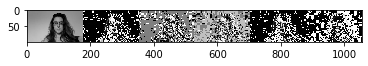

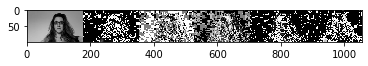

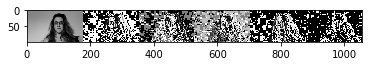

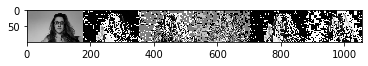

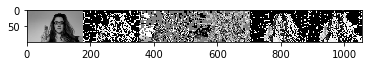

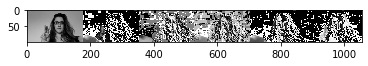

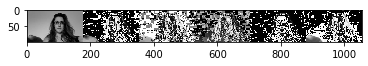

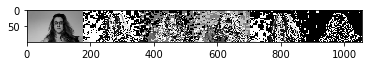

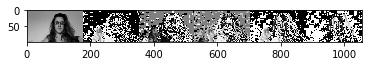

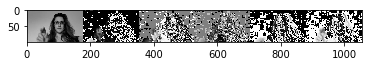

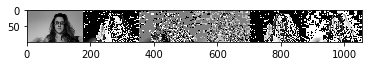

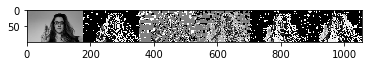

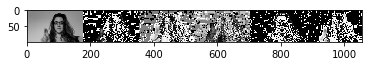

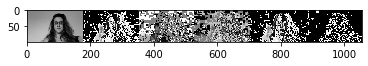

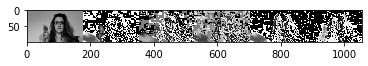

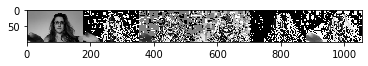

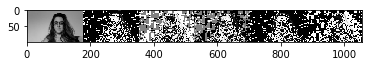

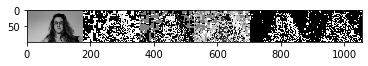

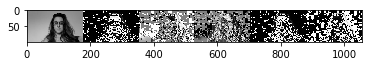

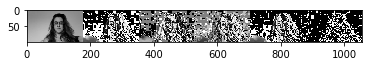

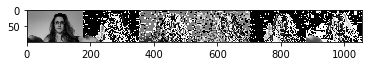

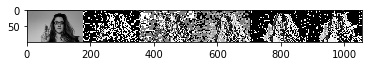

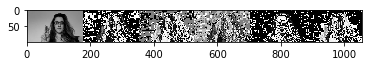

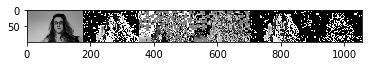

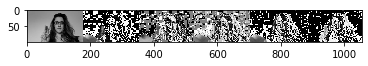

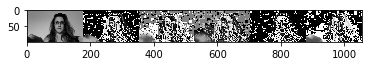

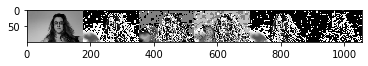

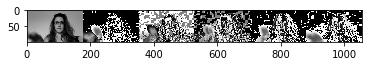

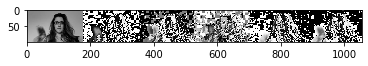

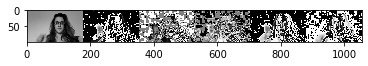

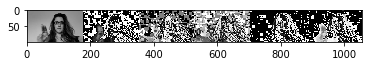

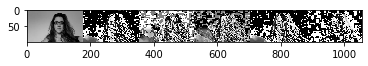

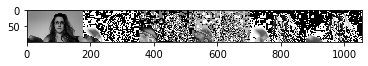

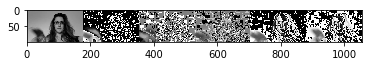

In [37]:
for i in range(video_gray_diff3.shape[0]):
    arr = np.concatenate([video_gray[i, :, :], 
                          video_gray_diff1[i, :, :], 
                          video_gray_diff2[i, :, :], 
                          video_gray_diff3[i, :, :], 
                          video_gray_diff_from_start[i, :, :],
                          video_gray_diff_from_end[i, :, :]
                         ], 1)
    plt.figure()
    plt.imshow(arr)

In [39]:
video_gray.shape

(37, 100, 176)

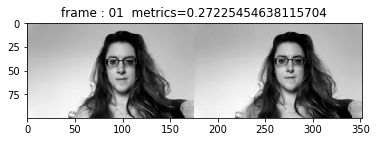

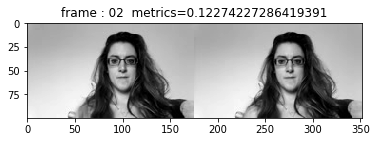

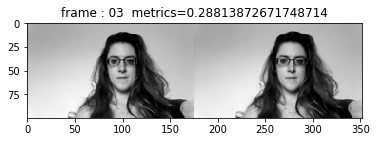

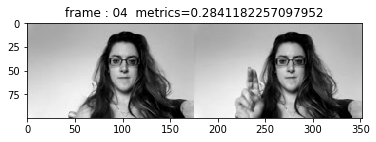

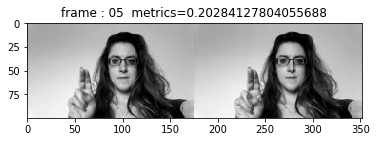

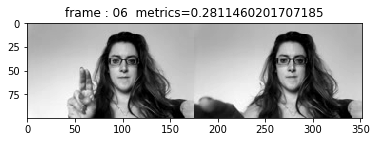

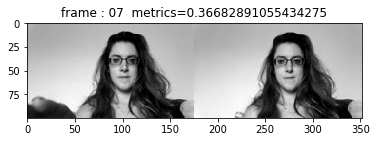

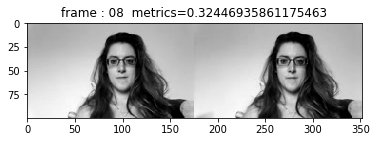

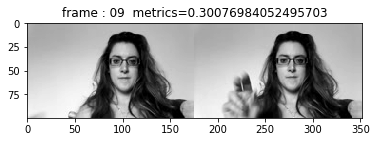

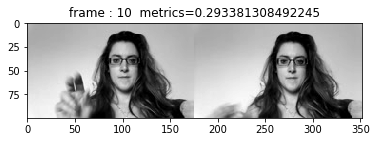

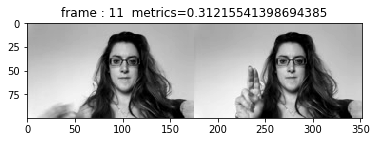

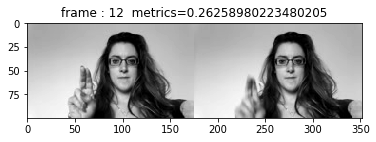

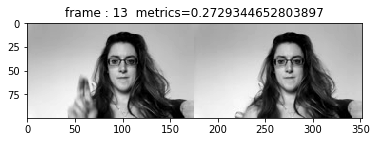

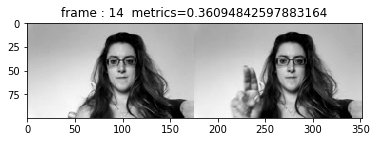

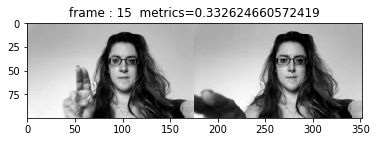

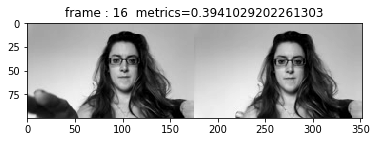

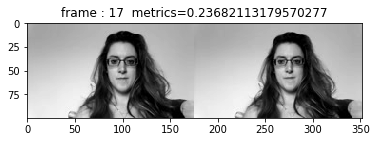

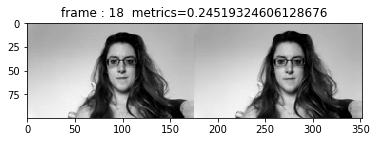

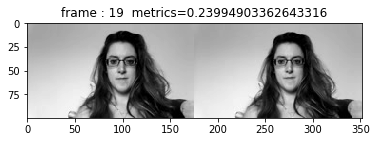

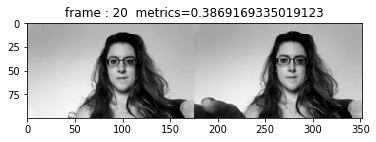

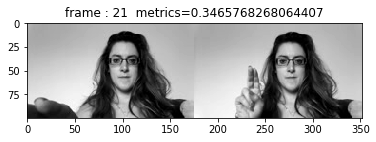

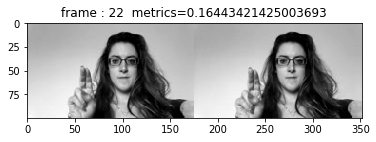

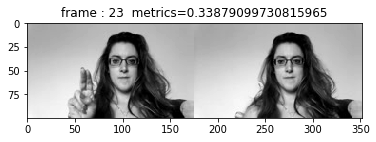

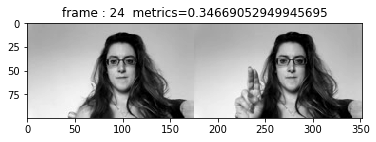

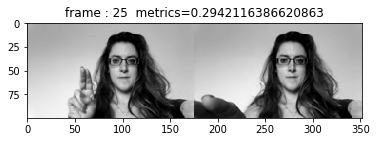

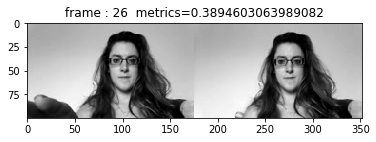

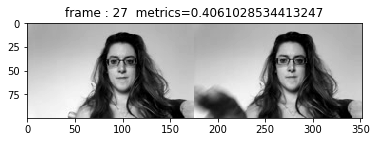

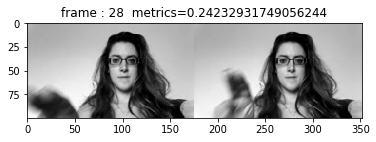

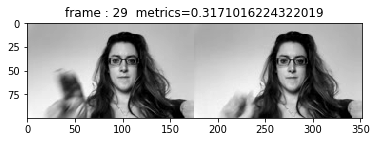

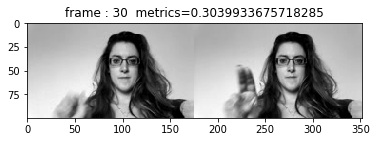

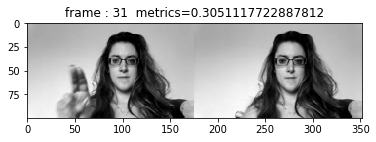

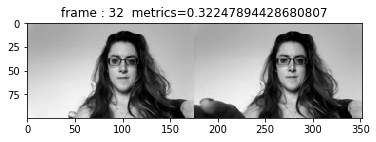

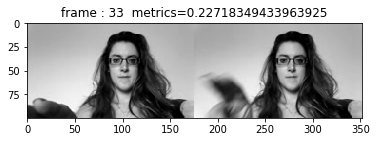

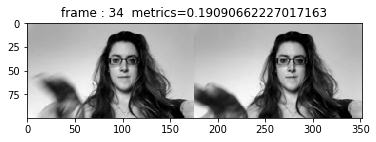

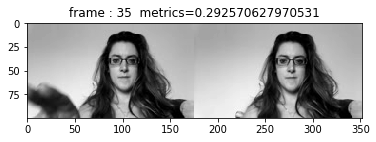

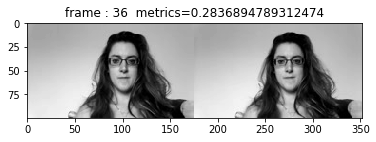

In [63]:
for i in range(video_gray.shape[0]):
    if i > 0:
        img_gray = video_gray[i, :, :] - video_gray[i-1, :, :]
        met = np.sum(img_gray ** 2) / np.sum(video_gray[i-1, :, :] ** 2)
        
        plt.figure()
        plt.title("frame : {:02}  metrics=".format(i)+str(met))
        plt.imshow(np.concatenate([video_gray[i-1, :, :], video_gray[i, :, :]], 1))
        plt.show()

In [102]:
contours[1].shape

(36, 1, 2)

In [ ]:
def normalize

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


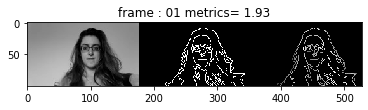

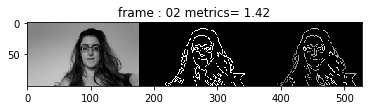

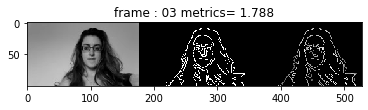

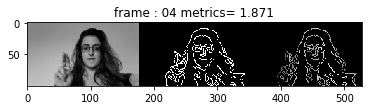

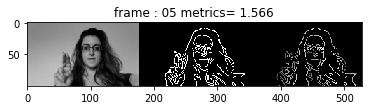

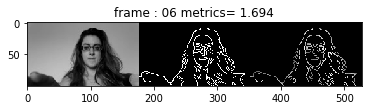

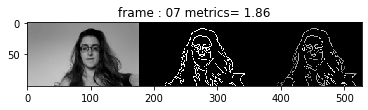

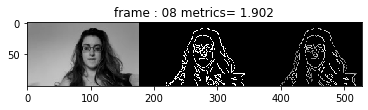

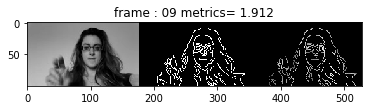

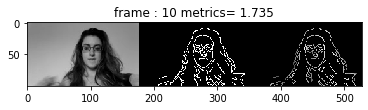

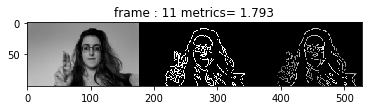

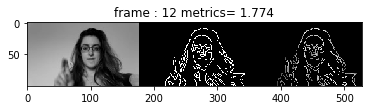

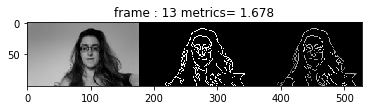

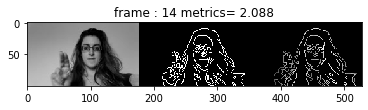

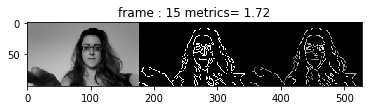

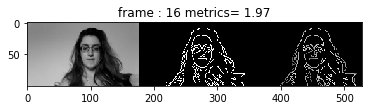

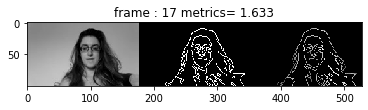

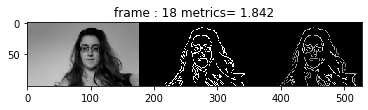

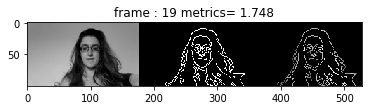

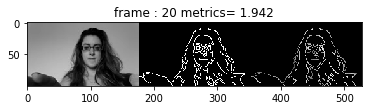

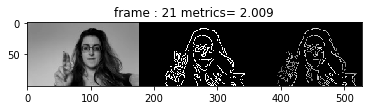

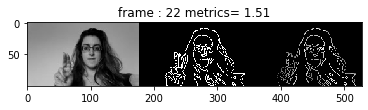

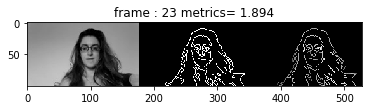

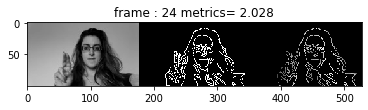

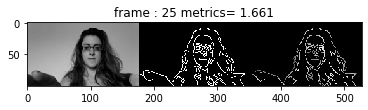

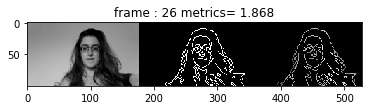

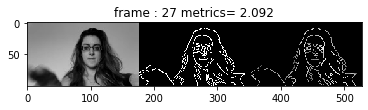

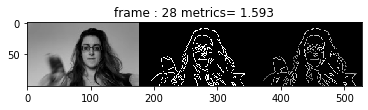

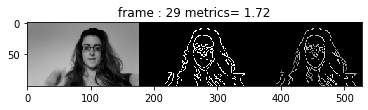

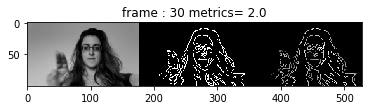

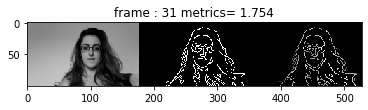

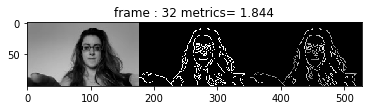

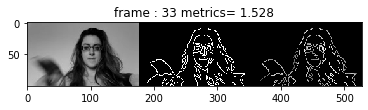

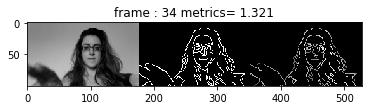

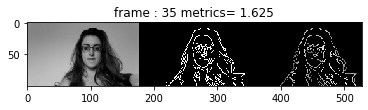

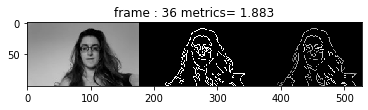

In [139]:
img_contour = np.zeros((video_gray.shape))

for i in range(video_gray.shape[0]):  
    if i > 0:
        img_next = video_gray[i, :, :]
        img_prev = video_gray[i-1, :, :]
        
        img_edge_next = cv2.Canny(img_next, 100, 200)
        img_edge_prev = cv2.Canny(img_prev, 100, 200)
        
        img_mix_next = img_next * img_edge_next
        img_mix_prev = img_prev * img_edge_prev

        met = np.sum((img_mix_next - img_mix_prev) ** 2) / np.sum(img_mix_prev ** 2)

        plt.figure()
        plt.title("frame : {:02}".format(i)+" metrics= {:02.4}".format(met))
        plt.imshow(np.concatenate([img_next, img_edge_next, img_mix_next], 1))

In [89]:
v_contour=[]
for i in range(video_gray.shape[0]):
    img = cv2.imread("./data/contour/"+str(i)+".jpg")
    v_contour.append(img)
v_contour = np.array(v_contour)

In [90]:
v_contour.shape

(37, 100, 176, 3)

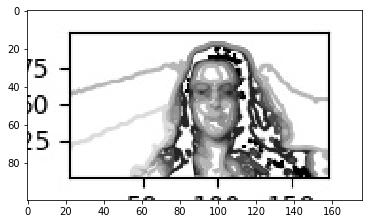

In [91]:
plt.imshow(v_contour[0])